In [23]:
from IPython.display import HTML

HTML(
'''
<script>
    code_show = false; // Code cells will be hidden by default

    function code_toggle() {
        if (code_show) {
            document.querySelectorAll('.jp-CodeCell .jp-InputArea').forEach(function(el) {
                el.style.display = 'none';
            });
        } else {
            document.querySelectorAll('.jp-CodeCell .jp-InputArea').forEach(function(el) {
                el.style.display = 'block';
            });
        }
        code_show = !code_show;
    }

    // Hide code cells when the page is loaded
    document.addEventListener("DOMContentLoaded", function() {
        document.querySelectorAll('.jp-CodeCell .jp-InputArea').forEach(function(el) {
            el.style.display = 'none';
        });
    });
</script>
<form action="javascript:code_toggle()">
    <input type="submit" value="Show / Hide code">
</form>
'''
)


In [1]:
import pandas as pd 
import numpy as np 
import glob 
import os, sys
from typing import Literal
import geopandas as gpd
import pyproj
from pyproj import CRS,Transformer
from shapely.ops import transform
from shapely import geometry, Point, LineString,wkt
import re
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from plotly.subplots import make_subplots
import numpy as np
from bs4 import BeautifulSoup
import requests
from PIL import Image

from gensim.models.ldamulticore  import LdaMulticore
from gensim.models.ldamodel import LdaModel
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.utils import simple_preprocess
from gensim import matutils

import random
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import collections
import string

from tabulate import tabulate
import osmnx as ox
import plotly.express as px

from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label, HoverTool,ColumnDataSource
from bokeh.io import output_notebook

from scipy.interpolate import griddata
import matplotlib.colors as mcolors
import plotly.graph_objects as go
import nltk
import yake
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

sys.path.append(os.path.abspath(r"code\python"))
from utils import Word_intrusion 
from utils import Topic_Modeling
from utils import get_model, bow_to_word,sentences_chart, pick_row, surface_plot





[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\terli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\terli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
crs_SA=CRS.from_proj4("+proj=tmerc +axis=enu +lat_0=0 +lon_0=19 +k=1 +x_0=0 +y_0=0 +ellps=WGS84 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs +type=crs")
pyLDAvis.enable_notebook()

Parcels_file=r"data\clean\Parcels.csv"
facilities_file=r"data\clean\facilities.csv"
cape_town=(gpd.GeoDataFrame(gpd.read_file(r"data\raw\shapefiles\functional\CapeTown_Functional_WGS84.shp").to_crs(crs_SA),geometry='geometry')).iloc[3]



parcels=pd.read_csv(Parcels_file,index_col=0)
SEC_dict={}
MAIN_SEC_dict={}



dict_list=[SEC_dict,MAIN_SEC_dict]
column_list=['SECTOR','MAIN_SECTOR']
zipped=zip(dict_list,column_list)

for Dicts, Columns in zipped: 
    for sect in parcels[Columns].tolist(): 
        if sect not in Dicts: 
            Dicts[sect]=1
        else: 
            Dicts[sect]+=1

SEC_dict=sorted(SEC_dict.items(),key=lambda x:x[1],reverse=True) 
MAIN_SEC_dict=sorted(MAIN_SEC_dict.items(),key=lambda x:x[1],reverse=True)



In [3]:
Topic_model=Topic_Modeling(Parcels_file, facilities_file,method='radius',radius=25)
LDA_results=Topic_model.LDA(method='Subclass',passes=1000,iterations=500,random_state=2024,alpha=0.01,n_topics=9,eta=0.001)

LDA_results.print_topics()


Topic_model.assign_topics()

Topic_model.fit_transform_label(max_ngram_size=1,print_keywords=False)

In [4]:
Topic_model.project()

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.181909  0.087989       1        1   7.017584
1      0.021209 -0.169710       2        1   8.713033
2     -0.218194  0.267946       3        1  17.587317
3      0.099787  0.101190       4        1  18.418678
4      0.108410  0.036905       5        1   7.378112
5     -0.014244 -0.042022       6        1  13.571611
6      0.367706  0.088438       7        1   6.219752
7     -0.081504 -0.338497       8        1  12.941025
8     -0.101260 -0.032241       9        1   8.152886, topic_info=                                                  Term        Freq  \
20            maintenance and repair of motor vehicles  278.000000   
39   retail sale of clothing, footwear and leather ...  125.000000   
12                        wholesale trade in foodstuff  110.000000   
103                          freight transport by road   44.000000   
68   retail sale in non-specialised stores with foo...   51.000000   
..                                                 ...         ...   
82   retail sale of electrical household appliances...    6.024638   
89      retail sale of beverages in specialised stores    3.303241   
10                             warehousing and storage    4.497075   
18   wholesale of construction materials, hardware,...    3.576026   
48   retail trade of automotive fuel in specialised...    3.157929   

          Total Category  logprob  loglift  
20   278.000000  Default  30.0000  30.0000  
39   125.000000  Default  29.0000  29.0000  
12   110.000000  Default  28.0000  28.0000  
103   44.000000  Default  27.0000  27.0000  
68    51.000000  Default  26.0000  26.0000  
..          ...      ...      ...      ...  
82    49.992590   Topic9  -3.8315   0.3908  
89    16.046236   Topic9  -4.4325   0.9262  
10   112.433899   Topic9  -4.1239  -0.7121  
18    57.046227   Topic9  -4.3531  -0.2628  
48    39.023351   Topic9  -4.4775  -0.0074  

[440 rows x 6 columns], token_table=      Topic      Freq                                               Term
term                                                                    
305       2  0.990938  accounting, bookkeeping and auditing activitie...
282       4  0.995487                         activities of call centres
311       6  1.001141  activities of collection agencies and credit b...
293       4  0.251609        activities of employment placement agencies
293       6  0.754827        activities of employment placement agencies
...     ...       ...                                                ...
134       8  0.086814  wholesale trade in household furniture, requis...
135       5  0.993374  wholesale trade in pharmaceuticals, toiletries...
215       3  0.989014  wholesale trade, except of motor vehicles and ...
154       4  0.995506                wired telecommunications activities
155       4  1.002042             wireless telecommunications activities

[553 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
def create_labels(labels_list): 
    if len(labels_list)!=len(Topic_model.id_to_label):
        print('There must be the same number of topics as there are labels')
    else: 
            
        for i in range(len(Topic_model.id_to_label)):
            Topic_model.id_to_label[i]=labels_list[i]
        return Topic_model.id_to_label

create_labels(['Hardware manufacturing, car rental',
               'Packaging/Storage, Manufacturing and wholesale of textile',
               'Printing, courier and advanced machines activities along metals wholesales and retail in specialised stores',
               'Harbour, warehousing and wholesale of foodstuff',
               'Car repair, plumbing/heat installation and hardware retail',
               'Freight transport and prime materials manufacturing',
               'Commercial area, clothes retail, restaurants etc',
               'Food industry, repair of electronics',
               'Automotive industry, food manufacturing'])

{0: 'Hardware manufacturing, car rental',
 1: 'Packaging/Storage, Manufacturing and wholesale of textile',
 2: 'Printing, courier and advanced machines activities along metals wholesales and retail in specialised stores',
 3: 'Harbour, warehousing and wholesale of foodstuff',
 4: 'Car repair, plumbing/heat installation and hardware retail',
 5: 'Freight transport and prime materials manufacturing',
 6: 'Commercial area, clothes retail, restaurants etc',
 7: 'Food industry, repair of electronics',
 8: 'Automotive industry, food manufacturing'}

In [6]:
Intrusion_test=Word_intrusion(Topic_model,n_topics=len(Topic_model.id_to_label),topn=5,Lambda=0.4)

-------  ------------------------------------------------------------------------------------------  ------------------------------------------------------------------------------------  ----------------------------------------------------  ---------------------------------------------------------------------------------------------------  --------------------------------------------------------------------
Topic 1  other wholesale of waste and scrap and other products                                       retail sale in non-specialised stores with food, beverages and tobacco predominating  manufacture of other food products                    retail trade of automotive fuel in specialised stores                                                retail sale of hardware, paints and glass in specialized stores
Topic 2  courier activities                                                                          repair of computers and peripheral equipment                                      

In [7]:
Intrusion_test.reveal_intruders()

Intruders were : 
For Topic 1: retail sale of hardware, paints and glass in specialized stores
For Topic 2: wholesale trade in books and stationery
For Topic 3: building of ships and floating structures
For Topic 4: manufacture of spices, condiments, vinegar, yeast, egg products, soups and other food products
For Topic 5: manufacture of spices, condiments, vinegar, yeast, egg products, soups and other food products
For Topic 6: maintenance and repair of motor vehicles
For Topic 7: other transportation support activities
For Topic 8: hairdressing
For Topic 9: wholesale trade in pharmaceuticals, toiletries and medical equipment


In [8]:
intrusion_test, intruders = Intrusion_test.to_pandas()

In [9]:


def relevance(Lambda,pwt, pw):
    return Lambda*np.log(pwt)+(1-Lambda)*np.log((pwt)/pw)

def get_relevance(model,topic_id,Lambda,topn=10,return_word=True): 
   N= model.lda_model.num_terms
   FREQ=model.Dictionary.cfs
   sorted_topic= sorted(model.lda_model.get_topic_terms(topicid=topic_id,topn=N))
   lifts= [(relevance(Lambda, value, (FREQ[key]/N))) for key, value in sorted_topic ]
   bestn= matutils.argsort(lifts,topn,reverse=True)
   if return_word==False :
        return [(idx,np.exp(lifts[idx])) for idx in bestn]
   else: 
        return [(model.Dictionary[idx],np.exp(lifts[idx])) for idx in bestn]


   

 

def create_topic_table(model,top_n=5,relevance=False,Lambda=0.4,assign_topics=False,with_prob=False):
    n_topics=model.n_topics
    list_topics_words=[]
    columns=['Topics/Words']
    dict_df={}

    if with_prob is False:
        for i in range((n_topics)):
            if assign_topics is True:
                word_list_i=["\\textbf{"+f'{model.id_to_label[i]}'+'}']
            else:
                word_list_i=[f'Topic {i+1} ']
            if relevance is False: 
                list_type=model.lda_model.get_topic_terms(i,top_n)
            else :
                list_type=get_relevance(model,i,Lambda=Lambda,topn=top_n)

            for index, (w, p) in enumerate(list_type):
                word_index= f'Word {index+1}'
                if word_index not in columns: 
                    columns.append(word_index)
                
                if relevance is True: 
                    word_list_i.append(w)
                else:
                    word_list_i.append(model.Dictionary[w])
            
            list_topics_words.append(word_list_i)

        df=pd.DataFrame(list_topics_words,columns=columns)

    else :
        for i in range((n_topics)):
            topic_name=f'Topic {i+1}'
            prob_name=f'Relevance {i+1}'
            list_words=[]
            list_probs=[]
          
            if relevance is False :
                list_type=model.lda_model.get_topic_terms(i,top_n)
                
            else: 
                list_type=get_relevance(model,i,Lambda=Lambda,topn=top_n)

            for w, p in list_type :
                if relevance is True: 
                    list_words.append(w)
                else:
                    list_words.append(model.Dictionary[w])
                
                list_probs.append(str(round(p,5)))

   
            dict_df.update({f'{topic_name}':list_words,f'{prob_name}':list_probs})
          


        df=pd.DataFrame(dict_df)


    
    return df


create_topic_table(Topic_model,top_n=3,relevance=True,assign_topics=False,Lambda=0.4,with_prob=True)

,Topic 1,Relevance 1,Topic 2,Relevance 2,Topic 3,Relevance 3,Topic 4,Relevance 4,Topic 5,Relevance 5,Topic 6,Relevance 6,Topic 7,Relevance 7,Topic 8,Relevance 8,Topic 9,Relevance 9
0,retail trade of automotive fuel in specialised...,0.52195,courier activities,0.29729,"retail sale of clothing, footwear and leather ...",0.35604,maintenance and repair of motor vehicles,0.37645,"wholesale trade in pharmaceuticals, toiletries...",0.30208,warehousing and storage,0.25853,freight transport by road,0.67462,building of ships and floating structures,0.29504,activities of head offices,0.35085
1,retail sale in non-specialised stores with foo...,0.40534,manufacture of other articles of paper and pap...,0.29234,food service activities of take-away counters,0.25788,"retail sale of hardware, paints and glass in s...",0.21756,postal activities,0.30208,wholesale of other machinery and equipment,0.22019,retail sale of used motor vehicles,0.38704,wholesale trade in foodstuff,0.27563,materials recovery,0.32016
2,manufacture of parts and accessories for motor...,0.31588,"manufacture of spices, condiments, vinegar, ye...",0.24271,other monetary intermediation,0.18238,sale of motor vehicle parts and accessories,0.13768,restaurants and mobile food service activities,0.29757,manufacture of furniture,0.21413,"wholesale of construction materials, hardware,...",0.28689,other transportation support activities,0.27296,other business support service activities,0.24627


In [10]:
Topic_model.id_to_label

{0: 'Hardware manufacturing, car rental',
 1: 'Packaging/Storage, Manufacturing and wholesale of textile',
 2: 'Printing, courier and advanced machines activities along metals wholesales and retail in specialised stores',
 3: 'Harbour, warehousing and wholesale of foodstuff',
 4: 'Car repair, plumbing/heat installation and hardware retail',
 5: 'Freight transport and prime materials manufacturing',
 6: 'Commercial area, clothes retail, restaurants etc',
 7: 'Food industry, repair of electronics',
 8: 'Automotive industry, food manufacturing'}

In [11]:
Topic_model.lda_model.print_topics()

[(0,
  '0.150*"retail trade of automotive fuel in specialised stores" + 0.137*"retail sale in non-specialised stores with food, beverages and tobacco predominating" + 0.068*"maintenance and repair of motor vehicles" + 0.047*"wholesale trade in foodstuff" + 0.040*"sale of motor vehicle parts and accessories" + 0.038*"manufacture of parts and accessories for motor vehicles" + 0.033*"manufacture of other structural metal products, e.g. metal doors, windows and gates." + 0.033*"other monetary intermediation" + 0.033*"retail sale of second-hand goods" + 0.029*"wholesale trade in beverages"'),
 (1,
  '0.099*"wholesale trade in foodstuff" + 0.062*"courier activities" + 0.056*"manufacture of other articles of paper and paperboard" + 0.047*"packaging activities" + 0.043*"printing" + 0.034*"repair of computers and peripheral equipment" + 0.034*"wholesale of construction materials, hardware, plumbing and heating equipment amd supplies" + 0.032*"other transportation support activities" + 0.030*"ma

In [13]:
vehicle=pd.read_pickle(r"data\clean\vehicles.pkl")
def labelise_activity(row): 
    if pd.notna(row['topic']):
        label=str(row['topic'])
    elif row['Inside'] and pd.isna(row['fId']): 
        label='Small_stop'
    elif row['Inside'] and pd.notna(row['fId']): 
        label='Undetermined_facility'
    else : 
        label= 'Out_of_CPT'
    
    return label

dict_exception={'Out_of_CPT':f"{len(Topic_model.id_to_label)}",'Undetermined_facility':f"{len(Topic_model.id_to_label)+1}",'Small_stop':f"{len(Topic_model.id_to_label)+2}"}
def exception_to_int(row): 
    if row['topic']!= row['label']: 
        return dict_exception[row['label']]
    else :
        return row['topic']
    
def Merge(dict1,dict2):
    return (dict1.update(dict2))

inverse_dict_exception={int(value): key for key, value in dict_exception.items()}
gram_dict=Topic_model.id_to_label.copy()
Merge(gram_dict,{int(value): key for key, value in dict_exception.items()})


In [14]:
print((' Over the {} activities recorded, {:.2f} are performed outside of Cape Town.'+
       ' \n Among the ones within the city {:.2f} occur outside a facilitiy and {:.2f} in one that isn\'t "labeled".'+
       '\n The remaining account for {} activities. Which represents only {:.2f} of activities.').
        format(len(vehicle),(vehicle['label'].value_counts().iloc[0]/len(vehicle)),
               vehicle['label'].value_counts().iloc[2]/len(vehicle),
               vehicle['label'].value_counts().iloc[1]/len(vehicle),
               vehicle['label'].value_counts().iloc[3:].sum(),
               vehicle['label'].value_counts().iloc[3:].sum()/len(vehicle)))

 Over the 424042 activities recorded, 0.50 are performed outside of Cape Town. 
 Among the ones within the city 0.19 occur outside a facilitiy and 0.24 in one that isn't "labeled".
 The remaining account for 31925 activities. Which represents only 0.08 of activities.


In [15]:
fig_labels=fig_labels=['Hardware manufacturing,<br>car rental',
               'Packaging/Storage, Manufacturing<br>and wholesale of textile',
               'Printing, courier<br>and advanced machines activities along <br> metals wholesales and retail in specialised stores',
               'Harbour, warehousing<br>and wholesale of foodstuff',
               'Car repair, plumbing/heat<br>installation and hardware retail',
               'Freight transport and<br>prime materials manufacturing',
               'Commercial area, <br>clothes retail, restaurants etc',
               'Food industry, repair of electronics',
               'Automotive industry,<br>food manufacturing']

TOPIC_LABEL=[f'Topic {i+1}' for i in range(len(fig_labels))]

# data=MAIN[0:10].sort_values('count',ascending=False)
# data
# fig=px.bar(data,x='count',y='MAIN_SECTOR',text_auto='.2s',color='MAIN_SECTOR')
# fig.update_yaxes(showticklabels=False)
# # fig.update_layout(
# #     font=dict(size=10))
# fig.show()
df=vehicle[vehicle['topic'].isin([str(key) for key in list(Topic_model.id_to_label.keys())])].groupby('topic').agg('count').reset_index()[['topic','chain']].rename(columns={'chain':'count'})
df['topic_labeled']=df.apply(lambda row: Topic_model.id_to_label[int(row['topic'])] if int(row['topic']) in Topic_model.id_to_label  else None,axis=1)
df['fig_labeled']=TOPIC_LABEL
fig = px.bar(df.sort_values('count',ascending=False), x='count', y='fig_labeled',color='fig_labeled',text_auto='.2s',labels={'fig_labeled':'Topics/Industrial environments','count':'Frequence'},
             color_discrete_sequence=px.colors.qualitative.Vivid,width=1800,height=600)
fig.update_yaxes(showticklabels=False)
fig.update_layout(
    font=dict(size=20),
    legend = dict(font = dict(size = 30)),
    legend_title="Topics",
)
# fig.write_image(r"..\..\graphics\Results\Activities_per_topic.png",height=600,width=1800)
fig.show()

In [16]:
import ipywidgets as ipw
import plotly.graph_objects as go 

In [17]:
grouped=pd.read_pickle(r"data\clean\Activity_chains.pkl")
labels=list(Topic_model.id_to_label.values())
n_topics= len(Topic_model.LDA_df.MAIN_TOPIC.unique())

Matrix=np.zeros([n_topics,n_topics],dtype=int)

def chain_activity(line): 
    for i in range(len(line)-1): 
        if int(line[i])  in list(Topic_model.id_to_label.keys()) and int(line[i+1])  in list(Topic_model.id_to_label.keys()) :
            Matrix[int(line[i]),int(line[i+1])]+=1

# grouped[grouped['prop_labeled']==100.00]['topic'].apply(lambda topic_list: chain_activity(topic_list))
grouped[grouped['prop_labeled']!=0]['topic'].apply(lambda topic_list: chain_activity(topic_list))

def truncate_labels(labels, max_length):
    return [label if len(label) <= max_length else label[:max_length] + '...' for label in labels]

short_labels=truncate_labels(labels,15)

fig1=px.imshow(Matrix[:len(labels),:len(labels)],labels=dict(x="Co-location",y='Co-locoation',color='interactions'),x=TOPIC_LABEL, y=TOPIC_LABEL,text_auto=True,color_continuous_scale=px.colors.sequential.Aggrnyl)
fig1.update_xaxes(side="top")
fig1.update_layout(coloraxis_colorbar_x=1, margin=dict(l=0,r=0,b=0,t=0), coloraxis_showscale=False,
yaxis1=dict(visible=True, showgrid=True, showline=False), font=dict(size=17))
fig1 = go.FigureWidget(fig1)


prop_matrix= (np.zeros([n_topics,n_topics],dtype=float))

for i in range(Matrix[:n_topics,:n_topics].shape[0]): 

    for j in range(Matrix[:n_topics,:n_topics].shape[1]): 
        prop_matrix[i,j]=Matrix[i,j]/Matrix[i].sum()


prop_matrix=np.around(prop_matrix,decimals=2)



fig2=px.imshow(prop_matrix,labels=dict(x="Co-locations",y='Co-locations',color='interactions'),x=TOPIC_LABEL, y=TOPIC_LABEL,text_auto=True,color_continuous_scale=px.colors.sequential.Aggrnyl)
fig2.update_xaxes(side="top")
fig2.update_layout(coloraxis_colorbar_x=1, margin=dict(l=0,r=0,b=0,t=0), coloraxis_showscale=False,
yaxis2=dict(visible=True, showgrid=True, showline=False), font=dict(size=17))
fig2 = go.FigureWidget(fig2)

ipw.HBox([fig1, fig2])

    'data': [{'coloraxis': 'coloraxis',
              'hovertemplate': 'Co-locat…

In [18]:
bigrams_dict={}
def bigrams(row): 
    for i in range(len(row['label'])-1):
        word_a=str(row['label'][i])
        word_b=str(row['label'][i+1])

        gram=word_a+'-'+word_b

        if gram not in bigrams_dict:
            bigrams_dict[gram]=1
        else: 
            bigrams_dict[gram]+=1

grouped.apply(lambda row: bigrams(row), axis=1)

bigrams_dict=sorted(bigrams_dict.items(),key=lambda x:x[1],reverse=True)
grouped=grouped[grouped['prop_labeled']!=0]
dict_out_of_town={}
for index, row in grouped.iterrows(): 
    for i in range(len(row['topic'])-1): 
        if row['topic'][i+1]==dict_exception['Out_of_CPT']:
            if row['topic'][i] not in list(dict_exception.values()): 
                worda=Topic_model.id_to_label[int(row['topic'][i])]
                if worda not in dict_out_of_town:
                    dict_out_of_town[worda]=1
                else:
                    dict_out_of_town[worda]+=1
dict_small_stop={}
for index, row in grouped.iterrows(): 
    for i in range(len(row['topic'])-1): 
        if row['topic'][i+1]==dict_exception['Small_stop']:
            if row['topic'][i] not in list(dict_exception.values()): 
                worda=Topic_model.id_to_label[int(row['topic'][i])]
                if worda not in dict_small_stop:
                    dict_small_stop[worda]=1
                else:
                    dict_small_stop[worda]+=1
dict_unknown={}
for index, row in grouped.iterrows(): 
    for i in range(len(row['topic'])-1): 
        if row['topic'][i+1]==dict_exception['Undetermined_facility']:
            if row['topic'][i] not in list(dict_exception.values()): 
                worda=Topic_model.id_to_label[int(row['topic'][i])]
                if worda not in dict_unknown:
                    dict_unknown[worda]=1
                else:
                    dict_unknown[worda]+=1
outgoing={}
for index, row in grouped.iterrows(): 
    for i in range(len(row['topic'])-1): 
        if int(row['topic'][i]) in list(Topic_model.id_to_label.keys()):
            worda=Topic_model.id_to_label[int(row['topic'][i])]
            if worda not in outgoing:
                outgoing[worda]=1
            else:
                outgoing[worda]+=1
dict_known={}
for index, row in grouped.iterrows(): 
    for i in range(len(row['topic'])-1): 
        if (int(row['topic'][i]) in list(Topic_model.id_to_label.keys())) and (int(row['topic'][i+1]) in list(Topic_model.id_to_label.keys())) : 
                worda=Topic_model.id_to_label[int(row['topic'][i])]
                if worda not in dict_known:
                    dict_known[worda]=1
                else:
                    dict_known[worda]+=1
def skip_line(line,limit):
    if len(line)>limit: 
        return line[0:limit] +'<br>'+line[limit::]
    else : 
        return line



list_dict=[outgoing,dict_out_of_town,dict_unknown,dict_small_stop,dict_known]
list_names=['outgoing','Out of town','Undetermined Facility','Small stops','Known Facility']
list_df=[]
for index, dictio in enumerate(list_dict): 
    list_df.append(pd.DataFrame(list(dictio.items()), columns=['co-location', f'{list_names[index]}']))

df=(pd.concat([d.set_index('co-location') for d in list_df], axis=1).reset_index()).sort_values(by='outgoing',ascending=False)
df['co-location']=TOPIC_LABEL


fig = px.bar(df, x="co-location", y=['Out of town','Undetermined Facility','Small stops','Known Facility'], height=1000,width=1600, text_auto=True,color_discrete_sequence=px.colors.qualitative.Vivid)
fig.update_layout(
    font=dict(size=25),
    xaxis=dict(tickwidth=0),
    legend = dict(font = dict(size = 30)),
    legend_title="Outgoing trips",
)


fig.show()

In [19]:
def gram_to_table(gram,topn):
    top_list=[]
    for chain, freq in gram[0:topn]: 
        top_list.append(chain)
    return top_list


gram_dict={key+1:value for key, value in gram_dict.items()}
filtered=grouped[grouped['prop_labeled']>=70.0]
trigrams_dict={}
def trigrams(row,word=True):
    if row['len_chain']>=2:
        for i in range(len(row['topic'])-2):
            
            word_a=row['topic'][i]
            word_b=row['topic'][i+1]
            word_c=row['topic'][i+2]

            if word:
                gram=gram_dict[int(word_a)+1]+'-'+gram_dict[int(word_b)+1]+'-'+gram_dict[int(word_c)+1]
            else: 
                gram=str(int(word_a)+1)+'-'+str(int(word_b)+1)+'-'+str(int(word_c)+1)

            if gram not in trigrams_dict:
                trigrams_dict[gram]=1
            else: 
                trigrams_dict[gram]+=1

    else : 
        pass


filtered.apply(lambda row: trigrams(row,word=False), axis=1)

trigrams_dict=sorted(trigrams_dict.items(),key=lambda x:x[1],reverse=True)


four_gram_dict={}
def fourgrams(row,word=True):
    if row['len_chain']>=4:
        for i in range(len(row['label'])-3):

            word_a=row['topic'][i]
            word_b=row['topic'][i+1]
            word_c=row['topic'][i+2]
            word_d=row['topic'][i+3]

            if word:
                gram=gram_dict[int(word_a)+1]+'-'+gram_dict[int(word_b)+1]+'-'+gram_dict[int(word_c)+1]+'-'+gram_dict[int(word_d)+1]
            else: 
                gram=str(int(word_a)+1)+'-'+str(int(word_b)+1)+'-'+str(int(word_c)+1)+'-'+str(int(word_d)+1)
            if gram not in four_gram_dict:
                four_gram_dict[gram]=1
            else: 
                four_gram_dict[gram]+=1

    else : 
        pass


filtered.apply(lambda row: fourgrams(row,word=False), axis=1)

four_gram_dict=sorted(four_gram_dict.items(),key=lambda x:x[1],reverse=True)

five_gram_dict={}
def fivegrams(row,word=True):
    if row['len_chain']>=5:
        for i in range(len(row['label'])-4):
            word_a=row['topic'][i]
            word_b=row['topic'][i+1]
            word_c=row['topic'][i+2]
            word_d=row['topic'][i+3]
            word_e=row['topic'][i+4]
            if word:
                gram=gram_dict[int(word_a)]+1+'-'+gram_dict[int(word_b)+1]+'-'+gram_dict[int(word_c)+1]+'-'+gram_dict[int(word_d)+1]+'-'+gram_dict[int(word_e)+1]
            else: 
                gram=str(int(word_a)+1)+'-'+str(int(word_b)+1)+'-'+str(int(word_c)+1)+'-'+str(int(word_d)+1)+'-'+str(int(word_e)+1)

            if gram not in five_gram_dict:
                five_gram_dict[gram]=1
            else: 
                five_gram_dict[gram]+=1

    else : 
        pass


filtered.apply(lambda row: fivegrams(row,word=False), axis=1)

five_gram_dict=sorted(five_gram_dict.items(),key=lambda x:x[1],reverse=True)


six_gram_dict={}
def sixgrams(row,word=True):
    if row['len_chain']>=5:
        for i in range(len(row['label'])-5):
            word_a=row['topic'][i]
            word_b=row['topic'][i+1]
            word_c=row['topic'][i+2]
            word_d=row['topic'][i+3]
            word_e=row['topic'][i+4]
            word_f=row['topic'][i+5]
            if word:
                gram=gram_dict[int(word_a)+1]+'-'+gram_dict[int(word_b)+1]+'-'+gram_dict[int(word_c)+1]+'-'+gram_dict[int(word_d)+1]+'-'+gram_dict[int(word_e)+1]+'-'+gram_dict[int(word_f)+1]
            else: 
                gram=str(int(word_a)+1)+'-'+str(int(word_b)+1)+'-'+str(int(word_c)+1)+'-'+str(int(word_d)+1)+'-'+str(int(word_e)+1)+'-'+str(int(word_f)+1)

            if gram not in six_gram_dict:
                six_gram_dict[gram]=1
            else: 
                six_gram_dict[gram]+=1

    else : 
        pass


filtered.apply(lambda row: sixgrams(row,word=False), axis=1)

six_gram_dict=sorted(six_gram_dict.items(),key=lambda x:x[1],reverse=True)


seven_gram_dict={}
def sevengrams(row,word=True):
    if row['len_chain']>=6:
        for i in range(len(row['label'])-6):
            word_a=row['topic'][i]
            word_b=row['topic'][i+1]
            word_c=row['topic'][i+2]
            word_d=row['topic'][i+3]
            word_e=row['topic'][i+4]
            word_f=row['topic'][i+5]
            word_g=row['topic'][i+6]
            if word:
                gram=gram_dict[int(word_a)+1]+'-'+gram_dict[int(word_b)+1]+'-'+gram_dict[int(word_c)+1]+'-'+gram_dict[int(word_d)+1]+'-'+gram_dict[int(word_e)+1]+'-'+gram_dict[int(word_f)+1]+'-'+gram_dict[int(word_g)+1]
            else: 
                gram=str(int(word_a)+1)+'-'+str(int(word_b)+1)+'-'+str(int(word_c)+1)+'-'+str(int(word_d)+1)+'-'+str(int(word_e)+1)+'-'+str(int(word_f)+1)+'-'+str(int(word_g)+1)

            if gram not in seven_gram_dict:
                seven_gram_dict[gram]=1
            else: 
                seven_gram_dict[gram]+=1

    else : 
        pass

filtered.apply(lambda row: sevengrams(row,word=False), axis=1)

seven_gram_dict=sorted(seven_gram_dict.items(),key=lambda x:x[1],reverse=True)

eight_gram_dict={}
def eightgrams(row,word=True):
    if row['len_chain']>=7:
        for i in range(len(row['label'])-7):
            word_a=row['topic'][i]
            word_b=row['topic'][i+1]
            word_c=row['topic'][i+2]
            word_d=row['topic'][i+3]
            word_e=row['topic'][i+4]
            word_f=row['topic'][i+5]
            word_g=row['topic'][i+6]
            word_h=row['topic'][i+7]
            if word:
                gram=gram_dict[int(word_a)+1]+'-'+gram_dict[int(word_b)+1]+'-'+gram_dict[int(word_c)+1]+'-'+gram_dict[int(word_d)+1]+'-'+gram_dict[int(word_e)+1]+'-'+gram_dict[int(word_f)+1]+'-'+gram_dict[int(word_g)+1]+'-'+gram_dict[int(word_gh)+1]
            else: 
                gram=str(int(word_a)+1)+'-'+str(int(word_b)+1)+'-'+str(int(word_c)+1)+'-'+str(int(word_d)+1)+'-'+str(int(word_e)+1)+'-'+str(int(word_f)+1)+'-'+str(int(word_g)+1)+'-'+str(int(word_h)+1)

            if gram not in eight_gram_dict:
                eight_gram_dict[gram]=1
            else: 
                eight_gram_dict[gram]+=1

    else : 
        pass


filtered.apply(lambda row: eightgrams(row,word=False), axis=1)

eight_gram_dict=sorted(eight_gram_dict.items(),key=lambda x:x[1],reverse=True)

In [20]:
df=pd.DataFrame(
    {'3 activities':gram_to_table(trigrams_dict,10),'4 activities':gram_to_table(four_gram_dict,10),
     '5 activities ':gram_to_table(five_gram_dict,10),'6 activities':gram_to_table(six_gram_dict,10)
     ,'7 activities':gram_to_table(seven_gram_dict,10)})

In [21]:
df

,3 activities,4 activities,5 activities,6 activities,7 activities
0,3-3-3,1-3-1-3,3-1-3-1-3,1-3-1-3-1-3,3-1-3-1-3-1-3
1,3-1-3,3-1-3-1,1-3-1-3-1,3-1-3-1-3-1,9-1-9-1-9-1-9
2,1-9-1,3-3-3-3,9-1-9-1-9,9-1-9-1-9-1,1-3-1-3-1-3-1
3,9-1-9,9-1-9-1,3-3-3-3-3,1-9-1-9-1-9,1-9-1-9-1-9-1
4,1-3-1,1-9-1-9,1-9-1-9-1,11-5-3-5-3-5,1-9-1-9-1-9-9
5,1-2-1,5-3-3-3,5-3-5-3-5,3-3-3-3-3-3,1-3-3-1-3-1-3
6,3-6-3,9-4-9-9,9-9-4-9-9,6-1-1-6-11-6,3-3-1-3-1-3-1
7,3-12-3,9-9-4-9,3-3-3-12-3,9-1-9-1-9-9,3-1-12-1-3-1-3
8,5-3-5,6-1-1-6,1-9-1-9-9,12-9-1-9-1-9,1-12-1-3-1-3-1
9,3-5-3,5-3-5-3,5-3-3-3-5,3-3-5-3-3-3,9-12-9-1-9-1-9


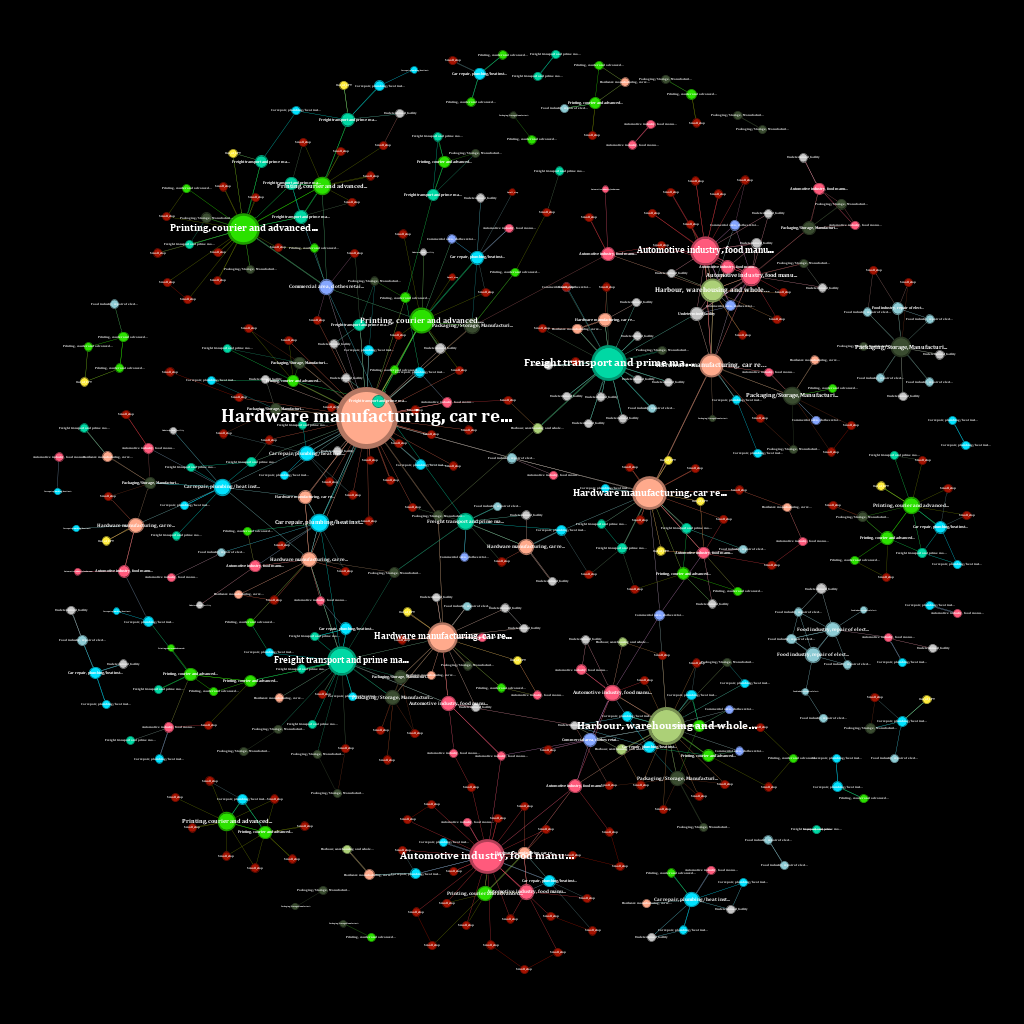

In [22]:


display(Image.open(r'graphics\network_black.png'))
